# Árboles de decisión (Decision Trees)

# Configurando el entorno

Lo primero que vamos a hacer es importar los módulos que vamos a utilizar, como hemos venido haciendo hasta ahora. Estos son, principalmente, Matplotlib, sklearn, pandas y numpy:

In [1]:
# Common imports
import numpy as np
import pandas as pd
import os

# Importamos nuestra librería de modelos por defecto:
import sklearn

# Vamos a poner una semilla para que si lo volvemos a ejecutar nos salga lo mismo
np.random.seed(42)

# Para crear gráficos:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# También establecemos dónde guardar las imágenes que vayamos creando
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Función para guardar gráficos (no hace falta que seamos capaces de crearla, ya hay alguien que lo ha hecho por nosotros, así que solo será usarla):
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Entrenamiento y visualización

Aquí, vamos a empezar fuertes y vamos a meternos de lleno al algoritmo que hemos visto en teoría. El dataset también nos debería sonar, pues vamos a utilizar el famoso dataset de las flores:

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

Una vez nos hemos creado y entrenado el modelo, sklearn nos ofrece una funcionalidad muy útil: representar el esquema que ha seguido en cada split.

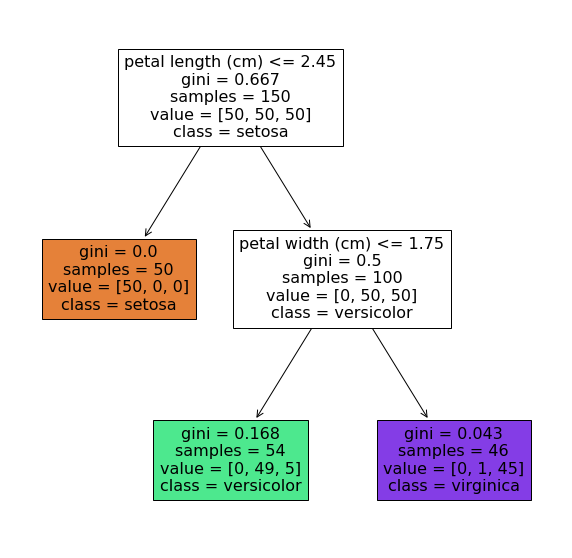

In [3]:
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(tree_clf,
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               filled = True);

Saving figure decision_tree_decision_boundaries_plot


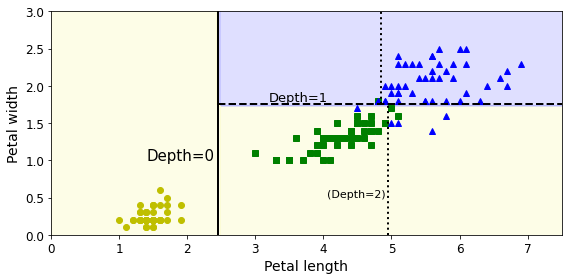

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "gs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "b^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

        
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show();

# Prediciendo clases (probabilidades)

Al igual que hemos visto para el último algoritmo de clasificación que hemos estudiado, la regresión logística, los árboles de decisión nos devuelven unas probabilidades para cada clase. Al igual que en dicho caso, las probabilidades son complementarias: 

In [5]:
X[10]

array([1.5, 0.2])

In [6]:
# Predicción para una flor de petal length = 5 cm y petal width = 1.5 cm
tree_clf.predict_proba([[2.5, 0.4]])

array([[0.        , 0.90740741, 0.09259259]])

In [7]:
tree_clf.predict([[2.5, 0.4]])

array([1])

Como la mayor probabilidad hace referencia a la clase 1, devolvemos una predicción de 1.

# Sensibilidad al conjunto de entrenamiento

El principal problema con los árboles de decisión es que son muy sensibles a las pequeñas variaciones en los datos de entrenamiento. Por ejemplo, si simplemente quitamos la flor versicolor más ancha del conjunto de entrenamiento (la que tiene pétalos de 4,8 cm de largo y 1,8 cm de ancho) y entrenamos un nuevo árbol de decisión, podemos obtener el modelo representado antes. Como podemos observar, scambia mucho respecto al anterior:

In [8]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris versicolor flower

array([[4.8, 1.8]])

In [9]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

Saving figure decision_tree_instability_plot


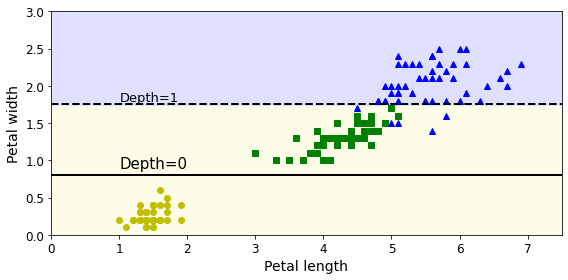

In [10]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

Además, los árboles de decisión también se pueden ver muy afectados si cambiamos ciertos hiperparámetros. Por ejemplo, vamos a comparar qué pasa si utilizamos los parámetros por defecto (izquierda) frente a un mínimo de 4 muestras por hoja:

Saving figure min_samples_leaf_plot


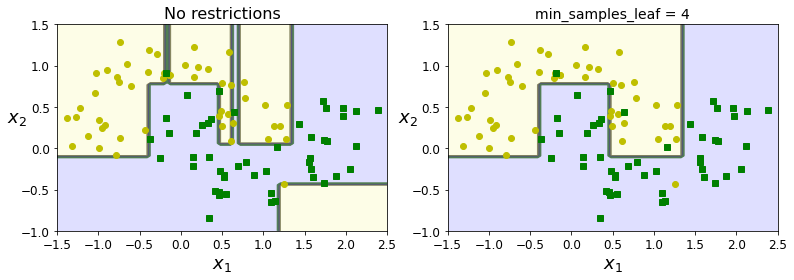

In [11]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

save_fig("min_samples_leaf_plot")
plt.show()

Como era de esperar, al decirle que con 4 muestras por hoja ya puede parar, no sigue realizando subdivisiones. No como en el caso de la izquerda, que sigue realizando subdivisiones, llevando al modelo a un claro overfitting.

¿Y qué pasaría si rotásemos los valores, es decir, tomáramos un punto de referencia y los moviéramos un ángulo concreto? En este caso, los hemos rotado de tal forma que se queden en, más o menos, el mismo rango para la varaible X2:


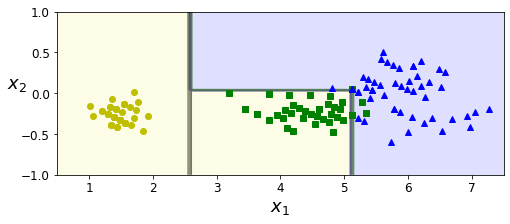

In [12]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

Bueno, pues vemos que se consigue adaptar, auqnue estos aspectos se harán más evidente en comparación con modelos lineales.

Veamos qué ocurre si tomamos unso datos que se repartan en forma de cuadrado y que estén claramente divididos por una línea vertical, y los rotamos 45º:

Saving figure sensitivity_to_rotation_plot


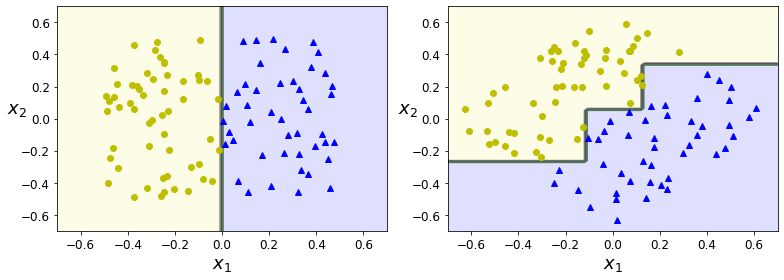

In [13]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

save_fig("sensitivity_to_rotation_plot")
plt.show()

Como podemos observar, los consigue identificar, pero le cuesta hacer esa relación, ya que no se adapta tan bien como la de la izquierda, que es más natural para este algoritmo.

# Árboles de regresión

Acabamos de ver los árboles de decisión para clasificación, pero también los podemos usar par regresión. Veamos un ejemplo:

In [14]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [15]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [16]:
tree_reg1

NameError: name 'tree_reg1' is not defined

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

Como puedes observar, lo que hace este algoritmo es dividir los datos en grupos como hacía antes, pero en lugar de decir que sean pertenecientes a una u otra clase, lo que hace es promediar sus valores. Además, estos grupos ya no se hacen en base al Gini/Entropía sino en base a los errores, en concreto, al MSE.

También podemos representar el esqeuma correspndiente a esta división:

In [ ]:
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(tree_reg1,
               feature_names=["x1"],
               class_names=iris.target_names,
               filled = True);

Finalmente, veamos el efecto de no limitar el árbol de decisión y dejar que agrupe todos los nodos sin restricción alguna, ¿puedes predecir qué pasará?

Saving figure tree_regression_regularization_plot


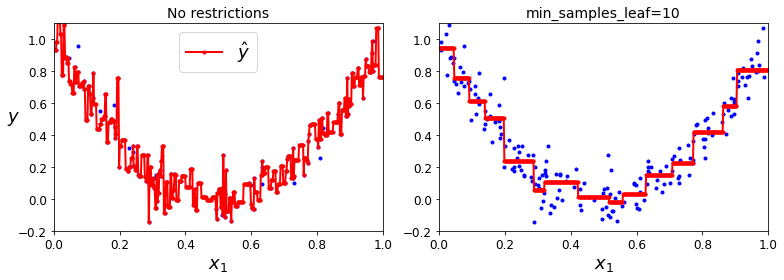

In [17]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()

Como podemos ver, si le damos libertad, intentara aproximar cada valor al propio punto, lo que da lugar a mucho overfitting.

### EJERCICIO

A continuación, te voy a dejar que pruebes ambas técnicas. Además, para que no sea demasiado trabajo, vamos a utilizar ambas predicciones sobre el mismo DataFrame, por lo que todo el tratamiento de variables podrás reusarlo. Utilizaremos el dataset de futbolistas, que tenía más información que el resto:

1. Con un regresor lineal no pudimos obtener muy bueno resultados pero, ¿podríamos obtener una distinción suficientemente buena entre los jugadores diestros y zurdos con árboles de decisión? Crea las variables que se te ocurran que pueden ayudar.

In [432]:
df = pd.read_csv("../../../data/FIFA20.csv")

# Probando a qudarme con menos muestras:
right_footed = df[df['preferred_foot'] == 'Right']
left_footed = df[df['preferred_foot'] == 'Left']

# Elegimos aleatoriamente los registros de los diestros:
resized_right_footed = np.random.choice(right_footed.index, size=len(left_footed), replace=False)

# Filtramos para quedarnos con esa selección:
right_footed = right_footed.loc[resized_right_footed]

# Creamos df:
df = right_footed.append(left_footed)

df['año'] = df['dob'].apply(lambda x: int(x[0:4]))
df['mes'] = df['dob'].apply(lambda x: int(x[5:7]))

df = df.dropna()

def position(x):
    x = str(x)
    if x[0] == 'R' and x not in ['RES']:
        return 'R'
    elif x[0] == 'L':
        return 'L'
    else:
        return ''

# df['team_position'] = df['team_position'].apply(lambda x: position(x))
df['money_pos'] = df.groupby("team_position").apply(lambda x: x['value_eur']/x['value_eur'].mean()).values

feature_cols = ['overall', 'potential', 'value_eur', 'wage_eur', 'año', 'mes', 'money_pos']
pred_col = 'preferred_foot'

In [433]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(df[feature_cols])
Y = df[pred_col]


In [434]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

In [435]:
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [436]:
print(f"Train: {clf.score(X_train, Y_train)}")
print(f"Test: {clf.score(X_test, Y_test)}")

Train: 0.7178068410462777
Test: 0.6883066093077825


In [418]:
pd.Series(Y_test).value_counts()

Left     1293
Right    1266
Name: preferred_foot, dtype: int64

In [419]:
pd.Series(clf.predict(X_test)).value_counts()

Left     1698
Right     861
dtype: int64

In [323]:
(Y_test=='Right').mean()

0.4968701095461659

2. Ahora que ya has utilizado el clasificador, vamos a centrarnos en el regresor. Utiliza esta técnica para predecir el salario de un jugador (wage_eur). Llama de forma diferente al modelo que hayas utilizado, que vamos a necesitarlo después

In [409]:
df = pd.read_csv("../../../data/FIFA20.csv")

df['año'] = df['dob'].apply(lambda x: int(x[0:4]))
df['mes'] = df['dob'].apply(lambda x: int(x[5:7]))
df['dia'] = df['dob'].apply(lambda x: int(x[8:10]))

df = df.dropna(subset=["team_position"])

df['money_pos'] = df.groupby("team_position").apply(lambda x: x['value_eur']/x['value_eur'].mean()).values

def position(x):
    x = str(x)
    if x[0] == 'R' and x not in ['RES']:
        return 'R'
    elif x[0] == 'L':
        return 'L'
    else:
        return ''

df['team_position'] = df['team_position'].apply(lambda x: position(x))

feature_cols = ['overall', 'potential', 'value_eur', 'año', 'mes', 'money_pos', 'team_position', 'dia']
pred_col = 'wage_eur'

In [410]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(df[feature_cols])
Y = df[pred_col]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=42)

clf2 = DecisionTreeRegressor(max_depth=10, random_state=42)
clf2.fit(X_train, Y_train)

print(f"Train: {clf2.score(X_train, Y_train)}")
print(f"Test: {clf2.score(X_test, Y_test)}")

Train: 0.9139595597357221
Test: 0.6472070222972741


### Selección de variables

Una de las características más interesantes de los árboles de decisión es que, a diferencia de los coeficientes que nos ofrecen los algoritmos lineales, este nos puede dar un ranking de la importancia de las varaibles que el considera para realizar el modelo. Para ello, solo hemos de tomar el modelo definido y pedirle que nos muestre su atributo ``feature_importance``

Veamos un ejemplo sencillo con los pasajeros del Titanic:

In [401]:
df = pd.read_csv("../../../data/Titanic.csv", sep='\t')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


In [402]:
X = pd.get_dummies(df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]).dropna()
y = df['Survived'].iloc[X.index]

In [403]:
# Como vamos a hacer pruebas de concepto rápidas, no separamos entre train y test, pero para hacer un estudio de verdad sí que deberíamos hacerlo:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)
tree_clf.score(X, y)
score = tree_clf.score(X, y)
score

0.8253968253968254

In [404]:
tree_clf.feature_importances_

array([0.19721037, 0.06218057, 0.        , 0.        , 0.        ,
       0.74060906, 0.        , 0.        , 0.        , 0.        ])

In [405]:
# Si queremos ordenarlas:
feature_importances = pd.DataFrame({'columna': X.columns, 'importancia': tree_clf.feature_importances_})

In [406]:
feature_importances = feature_importances.sort_values(by='importancia', ascending = False)
feature_importances

,columna,importancia
5,Sex_female,0.740609
0,Pclass,0.197210
1,Age,0.062181
2,SibSp,0.000000
3,Parch,0.000000
4,Fare,0.000000
6,Sex_male,0.000000
7,Embarked_C,0.000000
8,Embarked_Q,0.000000
9,Embarked_S,0.000000


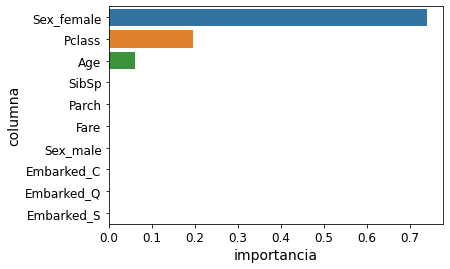

In [407]:
import seaborn as sns
sns.barplot(
    x=feature_importances['importancia'],
    y=feature_importances['columna'])

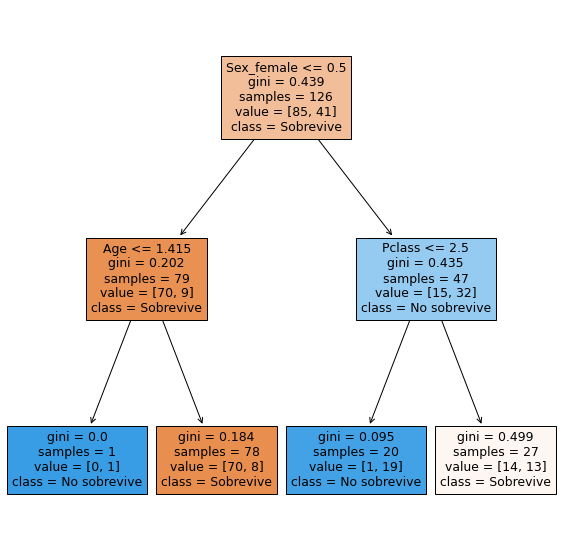

In [408]:
# Ahora, vamos a ver si se corresponde con el esquema:
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(tree_clf,
                       feature_names=X.columns,
               class_names=['Sobrevive', 'No sobrevive'],
               filled = True);

In [437]:
# Vamos a comprbar qué obtenemos si cogemos solo aquellas que ha usado:
X_2 = X[['Sex_female', 'Pclass', 'Age']]

tree_clf_2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_2.fit(X_2, y)
new_score = tree_clf_2.score(X_2, y)
new_score

KeyError: "None of [Index(['Sex_female', 'Pclass', 'Age'], dtype='object')] are in the [columns]"

In [356]:
new_score == score

True

Evidentemente, parece que obtenemos lo mismo, ya que hemos seleccinoado solo aquellas columnas que se utilizaban en el anterior:

In [357]:
feature_importances = pd.DataFrame({'columna': X_2.columns, 'importancia': tree_clf_2.feature_importances_})
feature_importances = feature_importances.sort_values(by='importancia', ascending = False)
feature_importances

,columna,importancia
0,Sex_female,0.740609
1,Pclass,0.197210
2,Age,0.062181


### EJERCICIO

1. Aplica este concepto de importancia de variables sobre los 2 algoritmos que has creado anteriormente, en el ejercicio de los futbolistas. ¿Qué variables obtienes como más importantes? Representa los diagramas de árbol como hemos hecho con el Titanic:

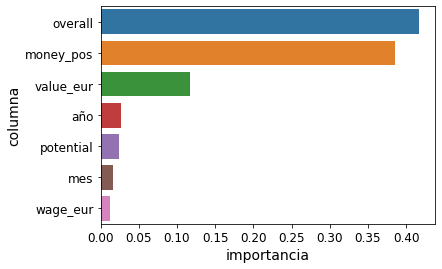

In [438]:
feature_importances = pd.DataFrame({'columna': X.columns, 'importancia': clf.feature_importances_})
feature_importances = feature_importances.sort_values(by='importancia', ascending = False)
feature_importances

sns.barplot(
    x=feature_importances['importancia'],
    y=feature_importances['columna'])

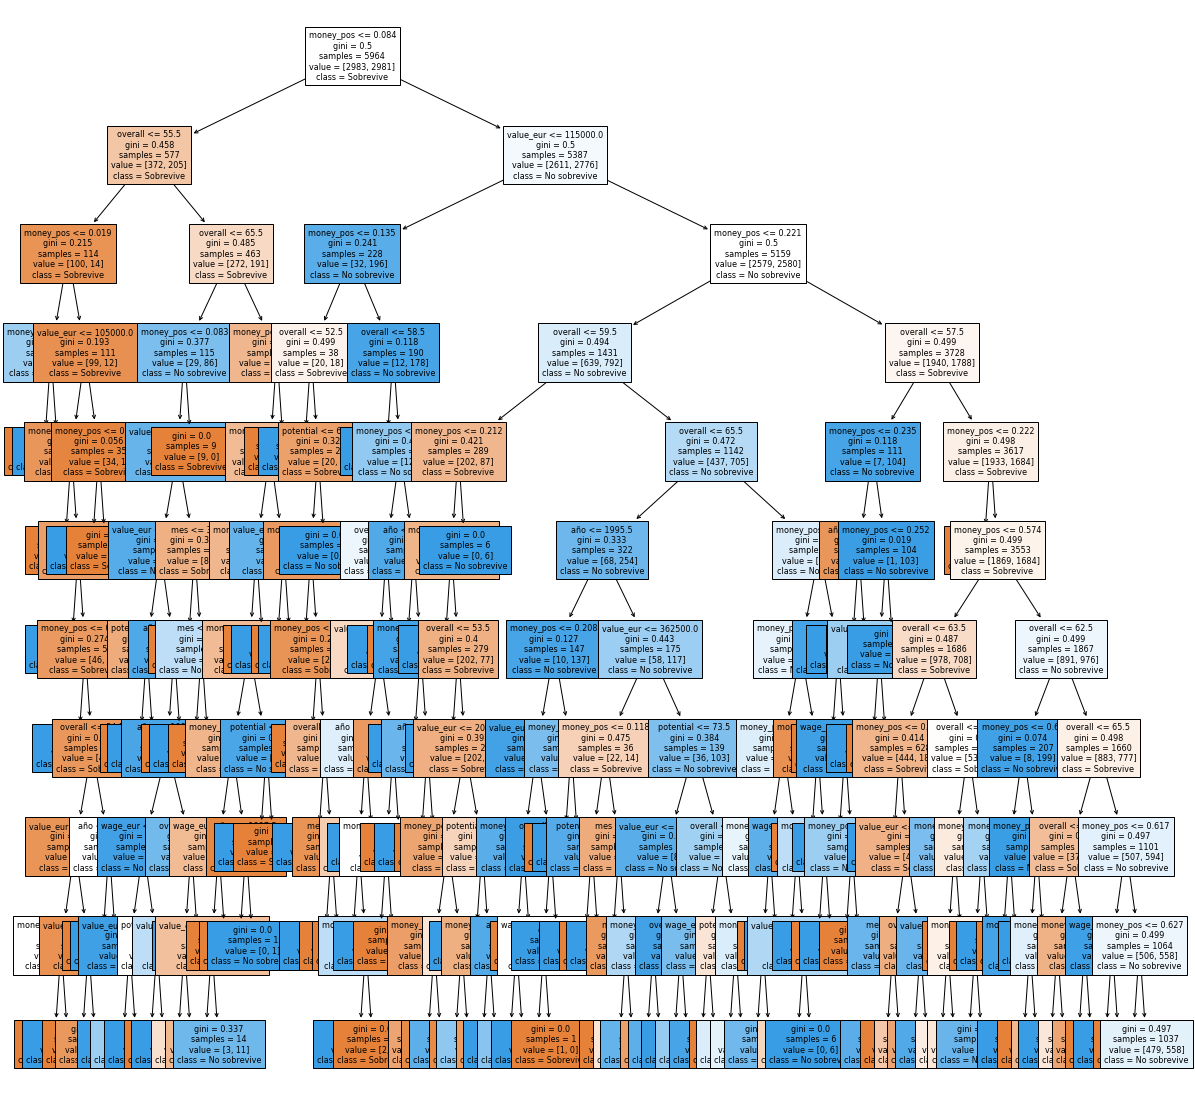

In [442]:
plt.figure(figsize=(100, 20))
sklearn.tree.plot_tree(clf,
                       feature_names=X.columns,
                       class_names=['Sobrevive', 'No sobrevive'],
                       filled = True, fontsize=8);

2. Por otra parte, estos algoritmos de clasificación que estamos diseñando realizan una predicción de forma probabilística, por lo que es posible obtener una probabilidad de que se cumpla (y la complementaria de que no). Representa la curva ROC de los 2 modelos de clasificación que acabamos de ver: futbolistas y Titanic. ¿Podríamos represetar también el del valor de los futbolistas?

3. ¿Qué AUC obtenemos?

In [444]:
probs = clf.predict_proba(X_test)
probs

array([[0.01515152, 0.98484848],
       [0.69327731, 0.30672269],
       [0.6969697 , 0.3030303 ],
       ...,
       [0.55011933, 0.44988067],
       [0.55011933, 0.44988067],
       [1.        , 0.        ]])

In [452]:
(Y_test=='Right').astype(int).values

array([1, 0, 1, ..., 0, 0, 0])

In [462]:
from sklearn import metrics

prob = probs[:,1]
real = (Y_test=='Right').astype(int).values

In [463]:
fpr, tpr, thresholds = metrics.roc_curve(list(real), list(prob))
metrics.auc(fpr, tpr)

0.7655096594684081

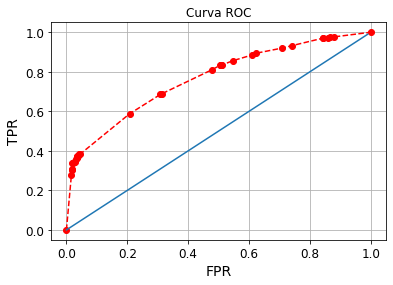

In [464]:
%matplotlib inline
plt.plot(fpr, tpr, linestyle="--", marker='o', color="r")
x_points=[i*0.01 for i in range(100)]
y_points=[i*0.01 for i in range(100)]
plt.plot(x_points, y_points)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curva ROC")
plt.grid();

In [466]:
fpr

array([0.        , 0.01643192, 0.01799687, 0.01877934, 0.01956182,
       0.02269171, 0.02425665, 0.02738654, 0.03051643, 0.03521127,
       0.03599374, 0.03599374, 0.03677621, 0.04147105, 0.04616588,
       0.20735524, 0.30907668, 0.31455399, 0.47887324, 0.50469484,
       0.50704225, 0.50938967, 0.51251956, 0.54694836, 0.61032864,
       0.6228482 , 0.70970266, 0.74256651, 0.84350548, 0.84428795,
       0.85837246, 0.86697966, 0.87949922, 1.        ])

In [488]:
# Ejemplo 2: malo
from sklearn.model_selection import train_test_split

X = pd.get_dummies(df[['año', 'money_pos']])
Y = (df[pred_col]=='Right').astype(int).values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=42)

clf2 = DecisionTreeClassifier(max_depth=10, random_state=42)
clf2.fit(X_train, Y_train)

print(f"Train: {clf2.score(X_train, Y_train)}")
print(f"Test: {clf2.score(X_test, Y_test)}")

Train: 0.6742119382964453
Test: 0.6597575283535393


In [489]:
from sklearn import metrics

probs = clf2.predict_proba(X_test)
probs

prob = probs[:,1]
real = Y_test

In [490]:
fpr, tpr, thresholds = metrics.roc_curve(list(real), list(prob))
metrics.auc(fpr, tpr)

0.7355193055531764

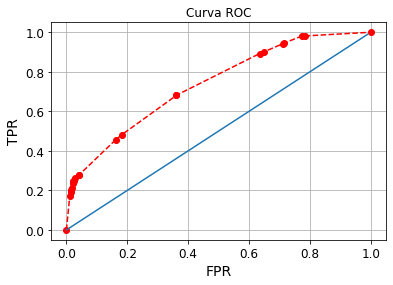

In [491]:
%matplotlib inline
plt.plot(fpr, tpr, linestyle="--", marker='o', color="r")
x_points=[i*0.01 for i in range(100)]
y_points=[i*0.01 for i in range(100)]
plt.plot(x_points, y_points)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curva ROC")
plt.grid();

In [ ]:
df = pd.read_csv("data/")